In [ ]:
import kagglehub
import os
import shutil

# Create a directory in the Colab runtime
preferred_path = '/content/fashion-product-images-dataset'
os.makedirs(preferred_path, exist_ok=True)

# Download the dataset from Kaggle
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

# Move the downloaded dataset to your preferred path
shutil.move(path, preferred_path)

print("Dataset saved to:", preferred_path)

  3%|▎         | 817M/23.1G [00:18<06:10, 64.5MB/s]

['25652.jpg', '52065.jpg', '27302.jpg', '49898.jpg', '39683.jpg', '32311.jpg', '8223.jpg', '56098.jpg', '29667.jpg', '4052.jpg']


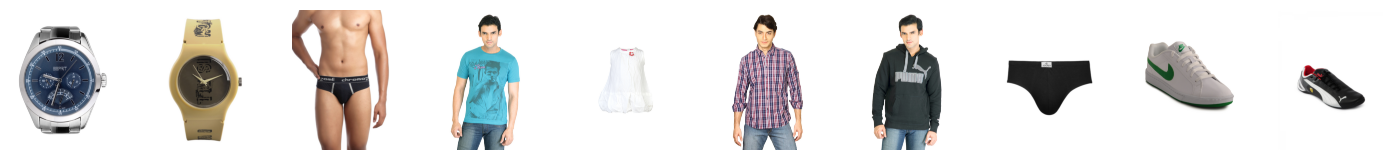

In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the dataset
path = '/content/fashion-product-images-dataset/1/fashion-dataset'
dataset_path = pathlib.Path(path)

# List all files in the dataset directory
images = os.listdir(dataset_path / 'images')

# Display the list of image files (first 10 for verification)
print(images[:10])

# Plot the images
plt.figure(figsize=(20, 20))
for i in range(10, 20):
    # Make sure to use the correct path for the image files
    cloth_img_path = dataset_path / 'images' / images[i]  # Change this line
    cloth_img = mpimg.imread(cloth_img_path)
    plt.subplot(6, 10, i - 10 + 1)
    plt.imshow(cloth_img)
    plt.axis("off")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [ ]:
import pandas as pd

# Define the path to the CSV file
csv_path = '/content/fashion-product-images-dataset/1/fashion-dataset/styles.csv'  # Update the path

# Read the CSV file, skipping bad lines
df = pd.read_csv(csv_path, nrows=6000, on_bad_lines='skip')

# Add a column for the image filenames
df['image'] = df.apply(lambda x: str(x['id']) + ".jpg", axis=1)

# Drop the 'year' column if it exists
if 'year' in df.columns:
    df = df.drop(columns=['year'])

# Reset the index
df = df.reset_index(drop=True)

# Print the shape of the dataframe
print(df.shape)

# Display the first 5 rows of the dataframe
df.head(5)


(6000, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,53759.jpg


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras import Sequential

# Define image dimensions
img_width, img_height, chnl = 200, 200, 3

# Load DenseNet121 with pre-trained ImageNet weights, without the top classification layer
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnl))

# Set DenseNet121 layers to be non-trainable
densenet.trainable = False

# Create a Sequential model and add DenseNet121 and GlobalMaxPooling2D layers
model = Sequential([
    densenet,
    GlobalMaxPooling2D()
])

# Build the model to define the input shape explicitly
model.build((None, img_width, img_height, chnl))

# Print the model summary to verify the trainable parameters
model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 6, 6, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 1024)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input  # Adjust this import if needed

# Define the path to your images
def img_path(img):
    return '/content/fashion-product-images-dataset/1/fashion-dataset/fashion-dataset/images/' + img

def model_predict(model, img_name):
    # Load and preprocess the image
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # Convert the image to an array
    x = image.img_to_array(img)
    # Expand dimensions to match model input
    x = np.expand_dims(x, axis=0)
    # Preprocess the input for the model
    x = preprocess_input(x)
    # Predict using the model
    return model.predict(x).reshape(-1)

# Make a copy of the DataFrame
df_copy = df

# Apply the model_predict function to the image column
df_embedding = df_copy['image'].apply(lambda x: model_predict(model, x))

# Convert the embeddings to a DataFrame
df_embedding = df_embedding.apply(pd.Series)

# Display the first 5 rows of the embeddings
df_embedding.head(5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import os

# Define the path to your images
def img_path(img):
    return '/content/fashion-product-images-dataset/1/fashion-dataset/fashion-dataset/images/' + img

def model_predict(model, img_names, batch_size=32, output_file='batch_embeddings.csv'):
    # Check if the output file already exists; if so, remove it to start fresh
    if os.path.exists(output_file):
        os.remove(output_file)

    batch_id = 0
    # Loop through the image names in batches
    for i in range(0, len(img_names), batch_size):
        batch = img_names[i:i + batch_size]

        # Load and preprocess images for the current batch
        batch_images = []
        for img_name in batch:
            img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            batch_images.append(x)

        # Stack the images in a batch
        batch_images = np.vstack(batch_images)

        # Predict using the model for the current batch
        preds = model.predict(batch_images)

        # Convert batch predictions to a DataFrame
        preds_df = pd.DataFrame(preds)

        # Append the batch predictions to the output CSV file
        preds_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)

        print("Batch", batch_id, "features extracted successfully!")
        batch_id += 1

# Make a copy of the DataFrame
df_copy = df

# Get the image names from the DataFrame
img_names = df_copy['image'].tolist()

# Extract features in batches and save to a local file
model_predict(model, img_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Batch 0 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 1 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 2 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Batch 3 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 4 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 5 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Batch 6 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 7 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 8 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Batch 9 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Batch 10 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 11 features extracted successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Batch 12 features extracted successf

In [ ]:
csv_file_path = 'batch_embeddings.csv'

# Read the CSV file into a pandas DataFrame
df_encodings = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print(df_encodings.head())

          0         1         2         3         4         5         6  \
0  0.002810  0.012423  0.014944  0.019022  0.243451  1.580463  0.001359   
1  0.000938  0.010240  0.014157  0.033368  0.232703  1.341559  0.001307   
2  0.001214  0.013573  0.015378  0.007322  0.364703  1.351418  0.002805   
3  0.001080  0.014465  0.022208  0.018075  0.293791  4.160221  0.001272   
4  0.001774  0.011407  0.012123  0.018447  0.337456  1.672157  0.001197   

          7         8         9  ...      1014      1015       1016      1017  \
0  0.012418  0.944371  0.001556  ...  0.853100  0.043298   5.379200  0.072373   
1  0.014866  0.515353  0.001125  ...  2.026179  2.503704  11.056705  1.638570   
2  0.005552  0.648474  0.001928  ...  4.141376  1.066642   1.784387  4.047664   
3  0.012537  0.477518  0.002318  ...  1.129939  0.632328  10.668559  2.681416   
4  0.011453  0.505672  0.000860  ...  0.718572  2.938368  10.829139  0.801264   

       1018      1019      1020       1021      1022      1023

In [ ]:
print(len(df_encodings))

6000


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Load the CSV file containing the embeddings
csv_file_path = 'batch_embeddings.csv'
df_embedding = pd.read_csv(csv_file_path)

# Step 2: Convert the DataFrame to a NumPy array (if not already)
embeddings_array = df_embedding.to_numpy()

# Step 3: Compute the cosine similarity matrix using linear_kernel
cosine_sim = linear_kernel(embeddings_array, embeddings_array)

# Display the first few values of the cosine similarity matrix
print(cosine_sim[:5, :5])

[[ 6679.8232789   5040.27399315  4420.71129382  4505.94549233
   6469.17773422]
 [ 5040.27399315  6915.86869982  4332.95886284  5298.98795212
   5715.12024809]
 [ 4420.71129382  4332.95886284 13600.38262299  4381.30992426
   5455.25643833]
 [ 4505.94549233  5298.98795212  4381.30992426  5629.35360103
   5230.28556319]
 [ 6469.17773422  5715.12024809  5455.25643833  5230.28556319
   8610.34141707]]


In [ ]:
indices = pd.Series(range(len(df)), index=df.index)

In [ ]:
def get_recommendations(index, df, cosine_sim=cosine_sim):
    idx = indices[index]

    # Get the pairwsie similarity scores of all clothes with that one
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the clothes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar clothes
    sim_scores = sim_scores[1:6]

    # Get the clothes indices
    cloth_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['image'].iloc[cloth_indices]

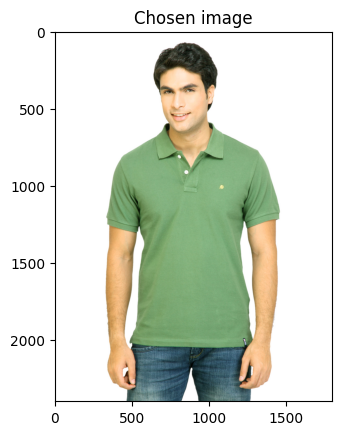

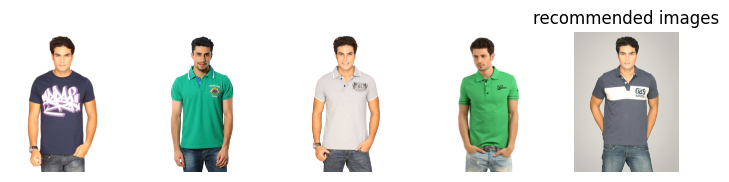

In [ ]:
chosen_img_indx = 755

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread('/content/fashion-product-images-dataset/1/fashion-dataset/fashion-dataset/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread('/content/fashion-product-images-dataset/1/fashion-dataset/fashion-dataset/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()